In [8]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [46]:
import kagglehub
import tensorflow as tf
import os
import sys

2024-11-20 09:56:12.714583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 09:56:12.790737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-20 09:56:12.813589: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 09:56:12.974096: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-20 09:56:14.914176: W tensorflow/compiler/tf2

In [ ]:
# Download latest version
path = kagglehub.dataset_download("lgmoneda/rijksmuseum")
paintings_path  = os.path.join(path, "rijksmuseum/painting/")
print("Path to dataset files:", paintings_path)

Path to dataset files: /home/bartwesthoff/.cache/kagglehub/datasets/lgmoneda/rijksmuseum/versions/5


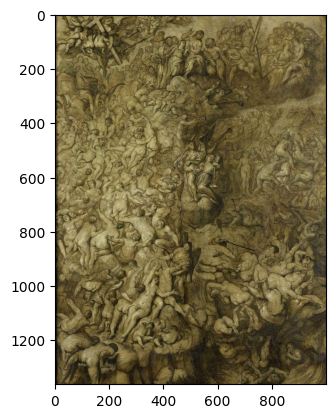

In [41]:
# pick a random painting
import random
import matplotlib.pyplot as plt
from PIL import Image
image = random.choice(os.listdir(paintings_path))
img_path = os.path.join(paintings_path, image)
img = Image.open(img_path)
plt.imshow(img)

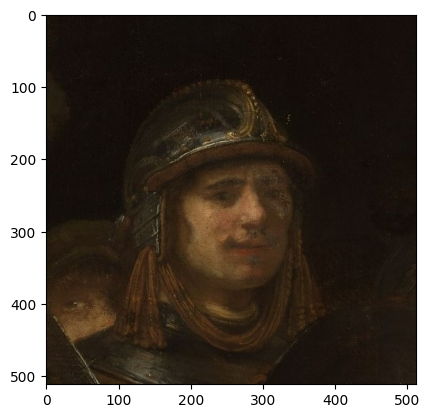

In [64]:
filename = 'train00-663.tfrec'
dataset = tf.data.TFRecordDataset(filename)
for index, raw_record in enumerate(dataset):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    bytes_string = example.features.feature['image'].bytes_list.value[0]
    # show img
    img = tf.image.decode_jpeg(bytes_string)
    plt.imshow(img)
    # save image as jpg in data/faces folder
    img = Image.fromarray(img.numpy())
    img.save(f'data/faces/{index}.jpg')